<a href="https://colab.research.google.com/github/DhavaAdePratama/AnalisisSentimenStockbit/blob/main/AnalisisSentimenStockbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper


from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID ''com.levelinfinite.sgameGlobal' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.stockbit.android',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

In [3]:
# Menyimpan ulasan dalam file CSV
import csv

with open('stockbit_reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])

In [4]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('stockbit_reviews.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,65119d43-3a86-47cb-a615-4c50934ac520,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Charting masih pinjam punya tradingview. Indik...,1,21,2.33.6,2025-01-27 13:55:12,"Halo Kak Adde,\n\nMohon maaf atas ketidaknyama...",2025-01-30 04:07:47,2.33.6
1,ee9ace9e-63d5-4b28-a510-4e55cd70ebb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelebihan : Chat Support cepat dijawab dan dil...,4,11,2.33.5,2025-01-10 04:29:09,"Halo kak Aufa,\n\nJika ""memperoleh penjatahan ...",2025-01-08 08:33:50,2.33.5
2,5e8f7fb6-3f2f-42cd-9236-ae11f861bdee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"setelah update aplikasi kenapa bagian ""portfol...",3,9,2.33.5,2025-01-20 04:38:10,"Halo kak Antagonis,\n\nMohon maaf atas ketidak...",2025-01-21 11:46:55,2.33.5
3,82c53b14-b7b2-437f-8ec3-d765dea52e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya bagus, fitur lengkap, tampilannya...",4,6,2.33.3,2025-01-02 02:56:13,"Halo Dodi,\n\nKami senang baca review positif ...",2025-01-02 14:59:20,2.33.3
4,9a3e3f61-53ed-47b9-bbc3-873d0e89fb13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke banget. fitur2nya saya suka. hanya untuk t...,5,22,2.33.4,2025-01-02 02:54:49,"Halo kak Oberlin,\n\nTerima kasih atas saran d...",2025-01-02 14:56:09,2.33.4


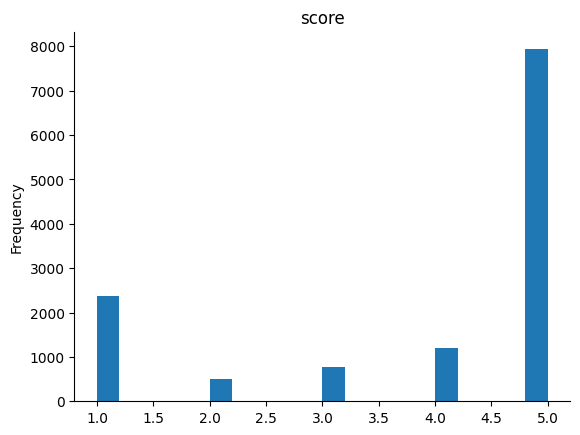

In [6]:
# score

from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12782 non-null  object        
 1   userName              12782 non-null  object        
 2   userImage             12782 non-null  object        
 3   content               12782 non-null  object        
 4   score                 12782 non-null  int64         
 5   thumbsUpCount         12782 non-null  int64         
 6   reviewCreatedVersion  10871 non-null  object        
 7   at                    12782 non-null  datetime64[ns]
 8   replyContent          9978 non-null   object        
 9   repliedAt             9978 non-null   datetime64[ns]
 10  appVersion            10871 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.1+ MB
